Grade=85/100

# Introduction:

The goal of this lab was to take and calibrate a solar spectrum. To take a solar spectrum we first need to calibrate the light that we are getting from the spectrograph. The spectrum of an object is the flux of the light per unit wavelength. Lines of absorption and emission are easy to recognize, so we used known lines to calibrate the data we took. 

In [8]:
%matplotlib inline
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from IPython.display import Image
Root = '/n/Users/bditt/Desktop/LAB6/'

### Reading in the data:

we took multiple exposures of the spectrum just to make sure that we got a good one in the bunch. What I do next is read in all 5 of the spectra, and check to see if they all are about the same.

In [73]:
Spectra = []
for i in range(1,6):
    Spectra.append(np.float64(fits.getdata(Root + 'Spectra'+str(i)+'.fit')))



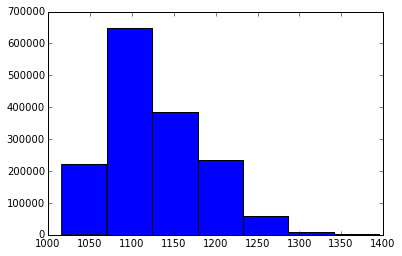

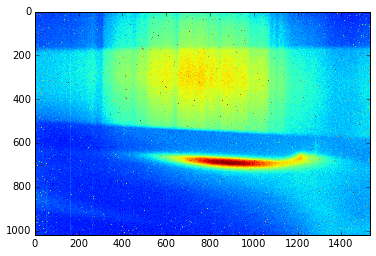

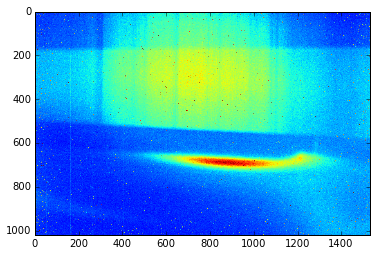

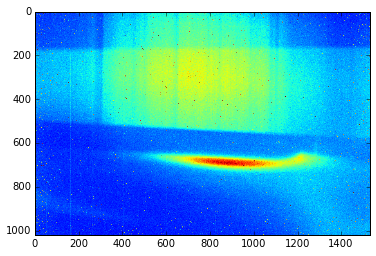

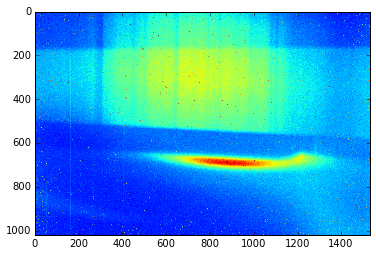

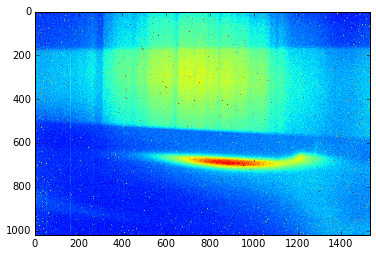

In [10]:
plt.figure()
plt.hist(Spectra[1].flatten(), bins=1000)
plt.xlim(1000,1400)


plt.figure()
plt.imshow(Spectra[0], vmin=1000,vmax=1400)

plt.figure()
plt.imshow(Spectra[1], vmin=1000,vmax=1400)

plt.figure()
plt.imshow(Spectra[2], vmin=1000,vmax=1400)

plt.figure()
plt.imshow(Spectra[3], vmin=1000,vmax=1400)

plt.figure()
plt.imshow(Spectra[4], vmin=1000,vmax=1400)
plt.show()

### Useful Data:

In this step, we took a subplot of the data where the lines of the spectrum are strong. Next, we take this data and average it vertically to make it into one single dimension array.

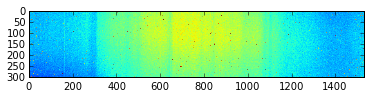

(1020, 1530)

In [11]:
SubSpectra = Spectra[1][200:500,:]
plt.figure()
plt.imshow(SubSpectra, vmin=1000,vmax=1400)
plt.show()

Spectra[1].shape

### Purging the Data:

Basically there are some huge peaks that are only one data point long in the X direction, so you can tell that they are noise. What we did was take the Y value of the point next to the noise and change it to that. 

In [12]:
SpectraLine = np.zeros(1530)
for i in range(200,501):
    Spectraline = Spectra[1][i,:]
    SpectraLine = SpectraLine + Spectraline
SpectraLine = SpectraLine/300
print SpectraLine

SpectraLine[332] = SpectraLine[333]
SpectraLine[218] = SpectraLine[219]
SpectraLine[161] = SpectraLine[160]
SpectraLine[402] = SpectraLine[401]
SpectraLine[415] = SpectraLine[416]    
SpectraLine[588] = SpectraLine[589]
SpectraLine[599] = SpectraLine[600]
SpectraLine[598] = SpectraLine[597]
SpectraLine[645] = SpectraLine[644]
SpectraLine[1476] = SpectraLine[1477]
SpectraLine[1503] = SpectraLine[1504]
SpectraLine[1506] = SpectraLine[1507]
SpectraLine[555] = SpectraLine[554]
SpectraLine[633] = SpectraLine[644]
SpectraLine[730] = SpectraLine[731]
SpectraLine[1265] = SpectraLine[1266]
SpectraLine[260] = SpectraLine[251]

[ 1131.97        1138.23        1125.87666667 ...,  1142.89333333  1141.48
  1141.21333333]


# Plotting the Data:

We first made an X vector to use to calibrate the data. from 0 to 1530. We took data using a florescent lightbulb and basically made lines where the known peaks were. Once we had those lines in place we were able to guess and check, shrinking the X vector, and shifting it around. Once we found values that would make it fit, we used the same X vector for the Solar spectrum that we took. We then identified absorption lines of certain elements to see if they would line up, as a final test of calibration. It was a success.

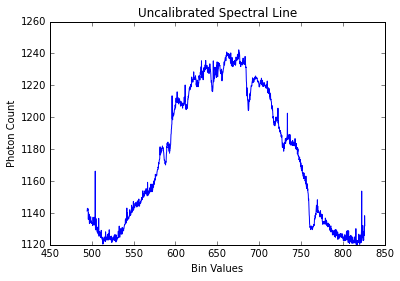

In [71]:
X = np.arange(1530)
X = X[::-1]
X = X*.217+494.5
plt.figure()
plt.plot(X, SpectraLine)
plt.title('Uncalibrated Spectral Line')
plt.xlabel('Bin Values')
plt.ylabel('Photon Count')
#plt.xlim(1503,1520)
plt.show()


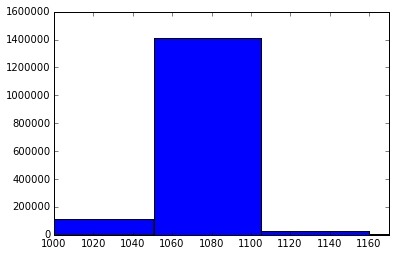

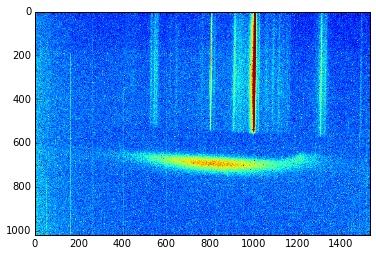

In [14]:
CFL = np.float64(fits.getdata(Root + 'CFL' +'.fit'))

plt.figure()
plt.hist(CFL.flatten(), bins=1000)
plt.xlim(1000,1170)


plt.figure()
plt.imshow(CFL, vmin=1030,vmax=1170)
plt.show()

In [22]:
CFL_Line = np.zeros(1530)
for i in range(200,401):
    CFLINERINO = CFL[i,:]
    CFL_Line = CFL_Line + CFLINERINO
CFL_Line = CFL_Line/200
print CFL_Line
CFL_Line[332] = CFL_Line[333]
CFL_Line[218] = CFL_Line[219]
CFL_Line[161] = CFL_Line[160]
CFL_Line[402] = CFL_Line[401]
CFL_Line[415] = CFL_Line[416]    
CFL_Line[588] = CFL_Line[589]
CFL_Line[599] = CFL_Line[600]
CFL_Line[598] = CFL_Line[597]
CFL_Line[645] = CFL_Line[644]
CFL_Line[1476] = CFL_Line[1477]
CFL_Line[1503] = CFL_Line[1504]
CFL_Line[1506] = CFL_Line[1507]
CFL_Line[555] = CFL_Line[554]
CFL_Line[633] = CFL_Line[644]
CFL_Line[730] = CFL_Line[731]
CFL_Line[1265] = CFL_Line[1266]
CFL_Line[260] = CFL_Line[261]

[ 1086.35   1099.855  1087.415 ...,  1074.76   1077.02   1075.35 ]


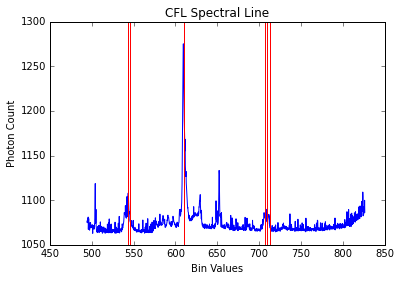

In [72]:
plt.figure()
plt.plot(X, CFL_Line)
plt.title('CFL Spectral Line')
plt.xlabel('Bin Values')
plt.ylabel('Photon Count')
plt.axvline(707,c='r')
plt.axvline(709,c='r')
plt.axvline(712.5,c='r')
plt.axvline(610,c='r')
plt.axvline(546,c='r')
plt.axvline(543,c='r')
#plt.xlim(500,600)
#plt.ylim(1060,1140)
plt.show()

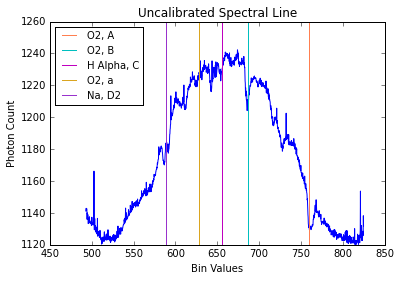

In [70]:
plt.figure()
plt.plot(X, SpectraLine)
plt.title('Uncalibrated Spectral Line')
plt.xlabel('Bin Values')
plt.ylabel('Photon Count')
plt.axvline(759.370, color = 'coral', label = 'O2, A')
plt.axvline(686.7, color = 'c', label = 'O2, B')
plt.axvline(656.28, color = 'm', label = 'H Alpha, C')
plt.axvline(627.66, color = 'goldenrod', label = 'O2, a')

plt.axvline(588.99, color = 'darkorchid', label = 'Na, D2')
plt.legend(loc=2, fontsize=10)
#plt.xlim(1503,1520)
plt.show()

# Conclusion:

The goal of the lab was to learn about how to calibrate a spectrograph. I feel like we adequately learned this, and more. This lab will be invaluble in the future, because analyzing spectra is a huge part of astronomy.